# Assignment Unsupervised Machine Learning Pour Le Petit Adam
## Objective
This assignment aims to test your knowledge of unsupervised machine learning methods using a real-world dataset. You will apply two distinct clustering methods and two distinct regression methods to a subset of the dataset. The goal is to gain insights into the data and interpret the results in a business context.

## Dataset
The dataset provided is a housing dataset with 81 variables and 1460 observations. The variables include numerical and categorical data related to housing characteristics and sale prices.

## Instructions
### Load and Explore the Dataset
1. Load the dataset and display basic statistics.
2. Handle missing values appropriately.
3. Select 10 combinations of the most relevant variables for the analysis.

### Clustering Methods
1. Apply two distinct clustering methods.
2. Visualize the clusters using appropriate plots.
3. Interpret the clustering results in a business context.

### Regression Methods
1. Apply two distinct regression methods
2. Evaluate the performance of the regression models using appropriate metrics.
3. Interpret the regression results in a business context.

### Presentation
1. Document your findings, visualizations, and interpretations.
2. Discuss any challenges encountered and how you addressed them.



1. Load and Explore the Dataset
- Loading and basic exploration of the dataset
- First descriptive statistics of the dataset
- Selection and justification of the variable choice for the parts below in 4 distinct data structures isolating up to 10 variables for each method to be used (**Clust1**, **Clust2**, **Reg1**, **Reg2**)

In [ ]:
import pandas as pd
from math import nan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
len(df)

1460

# 1) put the features into the right datastructure and deal with missing values

## **num to cat**

**MSSubClass** : Num to Cat

This variable identifies the type of dwelling involved in the sale.

In [ ]:
df.MSSubClass.value_counts()

,count
MSSubClass,
20,536
60,299
50,144
120,87
30,69
160,63
70,60
80,58
90,52


In [ ]:
MSSubClass_dict =  {20  :  '1-STORY 1946 & NEWER ALL STYLES',
                    30  :  '1-STORY 1945 & OLDER',
                    40  :  '1-STORY W/FINISHED ATTIC ALL AGES',
                    45  :  '1-1/2 STORY - UNFINISHED ALL AGES',
                    50  :  '1-1/2 STORY FINISHED ALL AGES',
                    60  :  '2-STORY 1946 & NEWER',
                    70  :  '2-STORY 1945 & OLDER',
                    75  :  '2-1/2 STORY ALL AGES',
                    80  :  'SPLIT OR MULTI-LEVEL',
                    85  :  'SPLIT FOYER',
                    90  :  'DUPLEX - ALL STYLES AND AGES',
                    120  :  '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                    150  :  '1-1/2 STORY PUD - ALL AGES',
                    160  :  '2-STORY PUD - 1946 & NEWER',
                    180  :  'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                    190  :  '2 FAMILY CONVERSION - ALL STYLES AND AGES'
                    }

df['MSSubClass'] = df['MSSubClass'].apply(lambda n: MSSubClass_dict[n])
df.MSSubClass.value_counts()

,count
MSSubClass,
1-STORY 1946 & NEWER ALL STYLES,536
2-STORY 1946 & NEWER,299
1-1/2 STORY FINISHED ALL AGES,144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER,87
1-STORY 1945 & OLDER,69
2-STORY PUD - 1946 & NEWER,63
2-STORY 1945 & OLDER,60
SPLIT OR MULTI-LEVEL,58
DUPLEX - ALL STYLES AND AGES,52


## **cat to bin**

**Street** : Cat to Bin

This variable represents the type of road access to property (material)

In [ ]:
df.Street.value_counts()

,count
Street,
Pave,1454
Grvl,6


In [ ]:
df.Street = df.Street.apply(lambda a: 0 if a=='Pave' else 1)
df.Street.value_counts()

,count
Street,
0,1454
1,6


Type of alley access to property (material)

In [ ]:
df.Alley.value_counts()

,count
Alley,
Grvl,50
Pave,41


In [ ]:
df.Alley = df.Alley.fillna('NA')
df.Alley.value_counts()

,count
Alley,
NA,1369
Grvl,50
Pave,41


**CentralAir** : Cat to Bin

This variable represents central air conditioning

In [ ]:
df.CentralAir.value_counts()

,count
CentralAir,
Y,1365
N,95


In [ ]:
df['CentralAir'] = df['CentralAir'].apply(lambda a: 0 if a=='N' else 1)
df.CentralAir.value_counts()

,count
CentralAir,
1,1365
0,95


## **cat to num**

**LotShape** : name change (from LotShape to LotIrregularity)

**LotIrregularity** : Cat to Num

In [ ]:
df.LotShape.value_counts()

,count
LotShape,
Reg,925
IR1,484
IR2,41
IR3,10


In [ ]:
LotShape_dict = {
    'Reg' : 0,
    'IR1' : 1,
    'IR2' : 2,
    'IR3' : 3
}

df['LotIrregularity'] = df.LotShape.apply(lambda a: LotShape_dict[a])
df.drop('LotShape', axis=1)
df = df.drop('LotShape', axis=1)
df['LotIrregularity'].value_counts()

,count
LotIrregularity,
0,925
1,484
2,41
3,10


**LandSlope** : Cat to Num

In [ ]:
df.LandSlope.value_counts()

,count
LandSlope,
Gtl,1382
Mod,65
Sev,13


In [ ]:
LandSlope_dict = {
    'Gtl' : 1,
    'Mod' : 2,
    'Sev' : 3
}

df['LandSlope'] = df.LandSlope.apply(lambda a: LandSlope_dict[a])
df['LandSlope'].value_counts()

,count
LandSlope,
1,1382
2,65
3,13


***useful quality dict***

In [ ]:
Qual_dict = {
    'Po' : 0,
    'Fa' : 1,
    'TA' : 2,
    'Gd' : 3,
    'Ex' : 4
}

**ExterQual** : Cat to Num

In [ ]:
df.ExterQual.value_counts()

,count
ExterQual,
TA,906
Gd,488
Ex,52
Fa,14


In [ ]:
df['ExterQual'] = df['ExterQual'].apply(lambda a: Qual_dict[a] if type(a)==str else nan)
df.ExterQual.value_counts()

,count
ExterQual,
2,906
3,488
4,52
1,14


**ExterCond** : Cat to Num

In [ ]:
df.ExterCond.value_counts()

,count
ExterCond,
TA,1282
Gd,146
Fa,28
Ex,3
Po,1


In [ ]:
df['ExterCond'] = df['ExterCond'].apply(lambda a: Qual_dict[a] if type(a)==str else nan)
df.ExterCond.value_counts()

,count
ExterCond,
2,1282
3,146
1,28
4,3
0,1


**HeatingQC** : Cat to Num

In [ ]:
df.HeatingQC.value_counts()

,count
HeatingQC,
Ex,741
TA,428
Gd,241
Fa,49
Po,1


In [ ]:
df['HeatingQC'] = df['HeatingQC'].apply(lambda a: Qual_dict[a] if type(a)==str else nan)
df.HeatingQC.value_counts()

,count
HeatingQC,
4,741
2,428
3,241
1,49
0,1


**KitchenQual** : Cat to Num

In [ ]:
df.KitchenQual.value_counts()

,count
KitchenQual,
TA,735
Gd,586
Ex,100
Fa,39


In [ ]:
df['KitchenQual'] = df['KitchenQual'].apply(lambda a: Qual_dict[a] if type(a)==str else nan)
df.KitchenQual.value_counts()

,count
KitchenQual,
2,735
3,586
4,100
1,39


**FireplaceQu** : Cat to Num

In [ ]:
df.FireplaceQu.value_counts()

,count
FireplaceQu,
Gd,380
TA,313
Fa,33
Ex,24
Po,20


In [ ]:
df['FireplaceQu'] = df['FireplaceQu'].apply(lambda a: Qual_dict[a] if type(a)==str else nan)
df.FireplaceQu.value_counts()

,count
FireplaceQu,
3.0,380
2.0,313
1.0,33
4.0,24
0.0,20


## **about basement**

**BsmtQual** : Cat to Num

In [ ]:
df.BsmtQual.value_counts()

,count
BsmtQual,
TA,649
Gd,618
Ex,121
Fa,35


In [ ]:
df['BsmtQual'] = df['BsmtQual'].apply(lambda a: Qual_dict[a] if type(a)==str else nan)
df.BsmtQual.value_counts()

,count
BsmtQual,
2.0,649
3.0,618
4.0,121
1.0,35


**BsmtCond** : Cat to Num

In [ ]:
df.BsmtCond.value_counts()

,count
BsmtCond,
TA,1311
Gd,65
Fa,45
Po,2


In [ ]:
df['BsmtCond'] = df['BsmtCond'].apply(lambda a: Qual_dict[a] if type(a)==str else nan)
df.BsmtCond.value_counts()

,count
BsmtCond,
2.0,1311
3.0,65
1.0,45
0.0,2


**BsmtExist** : variable created from BsmtCond NaN's

In [ ]:
BsmtExist_array = np.ones(len(df))
BsmtExist_array[df[df['BsmtCond'].isnull()].index]=0
df['BsmtExist']=BsmtExist_array.astype(int)
df.BsmtExist.value_counts()

,count
BsmtExist,
1,1423
0,37


**BsmtExposureExist** : variable created from BsmtExposure 'No' category

In [ ]:
df.BsmtExposure.value_counts()

,count
BsmtExposure,
No,953
Av,221
Gd,134
Mn,114


In [ ]:
BsmtExposure_array = np.ones(len(df))
BsmtExposure_array[df[df['BsmtExposure']=='No'].index]=0
df['BsmtExposureExist']=BsmtExposure_array.astype(int)
df.BsmtExposureExist.value_counts()

,count
BsmtExposureExist,
0,953
1,507


**BsmtExposure** : Category 'No' becomes NaN (for standardization purposes with other similar variables)

In [ ]:
df.BsmtExposure.value_counts()

,count
BsmtExposure,
No,953
Av,221
Gd,134
Mn,114


In [ ]:
df.loc[df[df['BsmtExposure']=='No'].index, 'BsmtExposure']=nan
df.BsmtExposure.value_counts()

,count
BsmtExposure,
Av,221
Gd,134
Mn,114


**BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF** : having NaN when there is no basement for standardization purposes

In [ ]:
df.loc[df[df['BsmtCond'].isnull()].index, 'BsmtFinSF1']=nan
df.loc[df[df['BsmtCond'].isnull()].index, 'BsmtFinSF2']=nan
df.loc[df[df['BsmtCond'].isnull()].index, 'BsmtUnfSF']=nan
df.loc[df[df['BsmtCond'].isnull()].index, 'TotalBsmtSF']=nan
df.loc[df[df['BsmtCond'].isnull()].index].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotIrregularity,BsmtExist,BsmtExposureExist
17,18,DUPLEX - ALL STYLES AND AGES,RL,72.0,10791,0,NA,Lvl,AllPub,Inside,1,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,2,2,Slab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,1,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000,0,0,1
39,40,DUPLEX - ALL STYLES AND AGES,RL,65.0,6040,0,NA,Lvl,AllPub,Inside,1,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,2,2,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,0,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000,0,0,1
90,91,1-STORY 1946 & NEWER ALL STYLES,RL,60.0,7200,0,NA,Lvl,AllPub,Inside,1,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,2,2,Slab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,1,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900,0,0,1
102,103,DUPLEX - ALL STYLES AND AGES,RL,64.0,7018,0,NA,Bnk,AllPub,Inside,1,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,2,1,Slab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,1,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964,0,0,1
156,157,1-STORY 1946 & NEWER ALL STYLES,RL,60.0,7200,0,NA,Lvl,AllPub,Inside,1,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,2,2,CBlock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,1,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500,0,0,1


**BsmtExposure** : Cat to Num

In [ ]:
df.BsmtExposure.value_counts()

,count
BsmtExposure,
Av,221
Gd,134
Mn,114


In [ ]:
BsmtExposure_dict = {
    'Gd' : 2,
    'Av' : 1,
    'Mn' : 0
}

df['BsmtExposure'] = df['BsmtExposure'].apply(lambda a: BsmtExposure_dict[a] if type(a)==str else nan)
df.BsmtExposure.value_counts()

,count
BsmtExposure,
1.0,221
2.0,134
0.0,114


## **about garage**

**GarageFinish** : Cat to Num

In [ ]:
df.GarageFinish.value_counts()

,count
GarageFinish,
Unf,605
RFn,422
Fin,352


In [ ]:
GarageFinish_dict = {
    'Unf' : 0,
    'RFn' : 1,
    'Fin' : 2
}

df['GarageFinish'] = df['GarageFinish'].apply(lambda a: GarageFinish_dict[a] if type(a)==str else nan)
df.GarageFinish.value_counts()

,count
GarageFinish,
0.0,605
1.0,422
2.0,352


**GarageQual** : Cat to Num

In [ ]:
df.GarageQual.value_counts()

,count
GarageQual,
TA,1311
Fa,48
Gd,14
Ex,3
Po,3


In [ ]:
GarageQual_dict = {
    'Po' : 0,
    'Fa' : 1,
    'TA' : 2,
    'Gd' : 3,
    'Ex' : 4
}

df['GarageQual'] = df['GarageQual'].apply(lambda a: GarageQual_dict[a] if type(a)==str else nan)
df.GarageQual.value_counts()

,count
GarageQual,
2.0,1311
1.0,48
3.0,14
4.0,3
0.0,3


**GarageCond** : Cat to Num

In [ ]:
df.GarageCond.value_counts()

,count
GarageCond,
TA,1326
Fa,35
Gd,9
Po,7
Ex,2


In [ ]:
GarageCond_dict = {
    'Po' : 0,
    'Fa' : 1,
    'TA' : 2,
    'Gd' : 3,
    'Ex' : 4
}

df['GarageCond'] = df['GarageCond'].apply(lambda a: GarageCond_dict[a] if type(a)==str else nan)
df.GarageCond.value_counts()

,count
GarageCond,
2.0,1326
1.0,35
3.0,9
0.0,7
4.0,2


In [ ]:
df.GarageType.value_counts()

,count
GarageType,
Attchd,870
Detchd,387
BuiltIn,88
Basment,19
CarPort,9
2Types,6


**GarageExist** : variable created from GarageType NaN values

In [ ]:
GarageExist_array = np.ones(len(df))
GarageExist_array[df[df['GarageType'].isnull()].index]=0
df['GarageExist']=GarageExist_array.astype(int)
df.GarageExist.value_counts()

,count
GarageExist,
1,1379
0,81


**GarageCars**, **GarageArea** : NaN value when there is no garage for standardisation purposes

In [ ]:
df.loc[df[df['GarageType'].isnull()].index, 'GarageCars']=nan
df.loc[df[df['GarageType'].isnull()].index, 'GarageArea']=nan
df.loc[df[df['GarageType'].isnull()].index].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotIrregularity,BsmtExist,BsmtExposureExist,GarageExist
39,40,DUPLEX - ALL STYLES AND AGES,RL,65.0,6040,0,NA,Lvl,AllPub,Inside,1,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,2,2,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,2,0,FuseP,1152,0,0,1152,0,0,2,0,2,2,1,6,Typ,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000,0,0,1,0
48,49,2 FAMILY CONVERSION - ALL STYLES AND AGES,RM,33.0,4456,0,NA,Lvl,AllPub,Inside,1,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,NA,0.0,2,2,BrkTil,2.0,2.0,NaN,Unf,0.0,Unf,0.0,736.0,736.0,GasA,3,1,SBrkr,736,716,0,1452,0,0,2,0,2,3,2,8,Typ,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000,0,1,0,0
78,79,DUPLEX - ALL STYLES AND AGES,RL,72.0,10778,0,NA,Lvl,AllPub,Inside,1,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,NA,0.0,2,2,CBlock,2.0,2.0,NaN,Unf,0.0,Unf,0.0,1768.0,1768.0,GasA,2,0,SBrkr,1768,0,0,1768,0,0,2,0,4,2,2,8,Typ,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500,0,1,0,0
88,89,1-1/2 STORY FINISHED ALL AGES,C (all),105.0,8470,0,NA,Lvl,AllPub,Corner,1,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,NA,0.0,1,1,CBlock,2.0,1.0,NaN,Unf,0.0,Unf,0.0,1013.0,1013.0,GasA,2,0,SBrkr,1013,0,513,1526,0,0,1,0,2,1,1,6,Typ,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000,1,1,0,0
89,90,1-STORY 1946 & NEWER ALL STYLES,RL,60.0,8070,0,NA,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,NA,0.0,2,2,PConc,3.0,2.0,NaN,GLQ,588.0,Unf,0.0,402.0,990.0,GasA,4,1,SBrkr,990,0,0,990,1,0,1,0,3,1,2,5,Typ,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600,0,1,0,0


## **about pool**

**PoolQC** : Cat to Num

In [ ]:
df.PoolQC.value_counts()

,count
PoolQC,
Gd,3
Ex,2
Fa,2


In [ ]:
PoolQC_dict = {
    'Po' : 0,
    'Fa' : 1,
    'TA' : 2,
    'Gd' : 3,
    'Ex' : 4
}

df['PoolQC'] = df['PoolQC'].apply(lambda a: PoolQC_dict[a] if type(a)==str else nan)
df.PoolQC.value_counts()

,count
PoolQC,
3.0,3
4.0,2
1.0,2


**PoolExist** : variable created from PoolQC NaN values

In [ ]:
PoolExist_array = np.ones(len(df))
PoolExist_array[df[df['PoolQC'].isnull()].index]=0
df['PoolExist']=PoolExist_array.astype(int)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotIrregularity,BsmtExist,BsmtExposureExist,GarageExist,PoolExist
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,0,NA,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,3.0,2.0,NaN,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,4,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,3,8,Typ,0,NaN,Attchd,2003.0,1.0,2.0,548.0,2.0,2.0,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0,1,0,1,0
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,0,NA,Lvl,AllPub,FR2,1,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,2,2,CBlock,3.0,2.0,2.0,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,4,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,Typ,1,2.0,Attchd,1976.0,1.0,2.0,460.0,2.0,2.0,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0,1,1,1,0
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,0,NA,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,3.0,2.0,0.0,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,4,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,3,6,Typ,1,2.0,Attchd,2001.0,1.0,2.0,608.0,2.0,2.0,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1,1,1,1,0
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,0,NA,Lvl,AllPub,Corner,1,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,2,2,BrkTil,2.0,3.0,NaN,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,3,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,3,7,Typ,1,3.0,Detchd,1998.0,0.0,3.0,642.0,2.0,2.0,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1,1,0,1,0
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,0,NA,Lvl,AllPub,FR2,1,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,3.0,2.0,1.0,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,4,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,3,9,Typ,1,2.0,Attchd,2000.0,1.0,3.0,836.0,2.0,2.0,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1,1,1,1,0


## **about fence**

In [ ]:
df.Fence.value_counts()

,count
Fence,
MnPrv,157
GdPrv,59
GdWo,54
MnWw,11


**FenceExist** :  variable created from Fence NaN values

In [ ]:
FenceExist_array = np.ones(len(df))
FenceExist_array[df[df['Fence'].isnull()].index]=0
df['FenceExist']=FenceExist_array.astype(int)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotIrregularity,BsmtExist,BsmtExposureExist,GarageExist,PoolExist,FenceExist
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,0,NA,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,3.0,2.0,NaN,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,4,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,3,8,Typ,0,NaN,Attchd,2003.0,1.0,2.0,548.0,2.0,2.0,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0,1,0,1,0,0
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,0,NA,Lvl,AllPub,FR2,1,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,2,2,CBlock,3.0,2.0,2.0,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,4,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,Typ,1,2.0,Attchd,1976.0,1.0,2.0,460.0,2.0,2.0,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0,1,1,1,0,0
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,0,NA,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,3.0,2.0,0.0,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,4,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,3,6,Typ,1,2.0,Attchd,2001.0,1.0,2.0,608.0,2.0,2.0,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1,1,1,1,0,0
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,0,NA,Lvl,AllPub,Corner,1,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,2,2,BrkTil,2.0,3.0,NaN,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,3,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,3,7,Typ,1,3.0,Detchd,1998.0,0.0,3.0,642.0,2.0,2.0,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1,1,0,1,0,0
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,0,NA,Lvl,AllPub,FR2,1,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,3.0,2.0,1.0,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,4,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,3,9,Typ,1,2.0,Attchd,2000.0,1.0,3.0,836.0,2.0,2.0,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1,1,1,1,0,0


## **special cases**

**LotFrontage** : NaN becomes 0 as a numerical value

The variable LotFrontage represent the linear feet of street connected to property

In [ ]:
df.LotFrontage.isnull().sum()

259

In [ ]:
df.LotFrontage = df.LotFrontage.fillna(0)
df.LotFrontage.isnull().sum()

0

**MasVnrType** : NaN becomes 'NA' as a category

In [ ]:
df.MasVnrType.value_counts()

,count
MasVnrType,
NA,872
BrkFace,445
Stone,128
BrkCmn,15


In [ ]:
df.MasVnrType.isnull().sum()

872

In [ ]:
df.MasVnrType = df.MasVnrType.fillna('NA')
df.MasVnrType.isnull().sum()

0

## nulls

In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
Alley,0
LandContour,0
Utilities,0
LotConfig,0


# 2) Feature Set

## **making up the set**

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeck

*In this context, the importance of a feature of a house is based on its relation to the price*

*This is true in a buisness context of selling, but also intuitively, if a feature is important, this means that the buyer would be willing to pay more for it (it has an impact on the value of the house)*

*Therefore, we will have that as a choosing criteria not only for the regression model of price prediction but also clustering*

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numer_df = df.select_dtypes(include=numerics)

**1) take the numerical features most correlated with the price (at least 40% correlation)**

In [ ]:
# sns.boxplot(data=numer_df, x='OverallQual', y='SalePrice')

In [ ]:
numer_df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold',
       'SalePrice', 'LotIrregularity', 'BsmtExist', 'BsmtExposureExist',
       'GarageExist', 'PoolExist', 'FenceExist'],
      dtype='object')

*Because having NaN values can lead to misconceptions when it comes to calculating correlations, we will give a value of 0 for the variables related to the basement when it is not present*

In [ ]:
df.loc[numer_df[numer_df['BsmtCond'].isnull()].index, 'BsmtFinSF1']=0
df.loc[numer_df[numer_df['BsmtCond'].isnull()].index, 'BsmtFinSF2']=0
df.loc[numer_df[numer_df['BsmtCond'].isnull()].index, 'BsmtUnfSF']=0
df.loc[numer_df[numer_df['BsmtCond'].isnull()].index, 'TotalBsmtSF']=0

**Our feature set will first be all the numerical features that are correlated to the price more than 40 percent**

In [ ]:
corrs = numer_df.corr()['SalePrice'].sort_values(ascending=False)
feature_set = corrs[corrs>0.4].index.tolist()
feature_set
# 2ndFlrSF

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GarageCars',
 'TotalBsmtSF',
 'GarageArea',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'GarageFinish',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'PoolQC',
 'HeatingQC']

In [ ]:
len(feature_set) - 1
# we have 19 features

19

- Because 1stFlrSF + 2ndFlrSF = GrLivArea,
we will replace GrLivArea by 2ndFlrSF in our set of features

In [ ]:
df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']].head()
# df['1stFlrSF']-df['TotalBsmtSF']

,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea
0,856.0,856,854,1710
1,1262.0,1262,0,1262
2,920.0,920,866,1786
3,756.0,961,756,1717
4,1145.0,1145,1053,2198


In [ ]:
feature_set.remove('GrLivArea')
feature_set.append('2ndFlrSF')

In [ ]:
len(feature_set) - 1
# we still have 19 features

19

- We will not take into account the variable 'OverallQual' that refer to an overall quality assessment made by a professional, because it is not useful in the context of searching what are the impacts of the house characteristics on the price

In [ ]:
feature_set.remove('OverallQual')

In [ ]:
len(feature_set) - 1
# We are now left with 18 features

18

<Axes: >

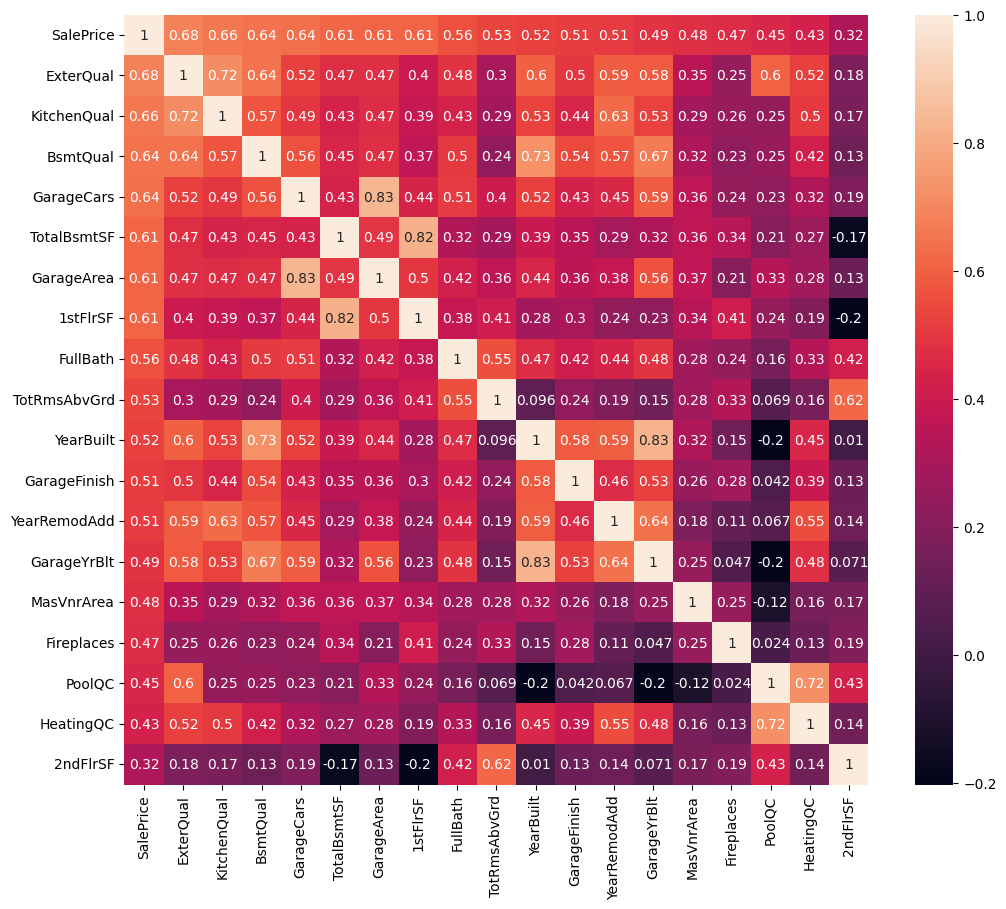

In [ ]:
# GrLivArea, GarageCars, TotalBsmtSF, GarageArea, 1stFlrSF, 2ndFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, GarageFinish,   YearRemodAdd, GarageYrBlt, MasVnrArea, Fireplaces, PoolQC, HeatingQC

plt.figure(figsize=(12, 10))
sns.heatmap(df[feature_set].corr(), annot=True)

*When two features are very correlated, we only keep the one witch has the most direct impact on the price*

GarageArea(0.61), GarageCars(0.64) --> **GarageCars**

YearBuilt(0.52), GarageYrBlt(0.49) --> **YearBuilt**

In [ ]:
feature_set.remove('GarageArea')
feature_set.remove('GarageYrBlt')

In [ ]:
len(feature_set) - 1
# now we are left with 16 features

16

Now, we are left with 16 features, so we still need to drop 6 features to get only 10

In [ ]:
df[feature_set].isnull().sum()

,0
SalePrice,0
ExterQual,0
KitchenQual,0
BsmtQual,37
GarageCars,81
TotalBsmtSF,0
1stFlrSF,0
FullBath,0
TotRmsAbvGrd,0
YearBuilt,0


We will drop PoolQC as it has too many NaN values

In [ ]:
feature_set.remove('PoolQC')

In [ ]:
len(feature_set) - 1

15

- We will choose the features that refer to

1) the quantity (surface area or couting something) : *GarageCars, FullBath, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, MasVnrArea*

2) the quality (rating) : *ExterQual, KitchenQual, BsmtQual, HeatingQC*

This way we can group the features to get better insights

*We have prioritized the features that are better correlated with the price*

In [ ]:
df[feature_set].corr()['SalePrice']

,SalePrice
SalePrice,1.000000
ExterQual,0.682639
KitchenQual,0.659600
BsmtQual,0.644019
GarageCars,0.637095
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [ ]:
feature_set = ['ExterQual', 'KitchenQual', 'BsmtQual', 'HeatingQC', 'GarageCars', 'FullBath', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MasVnrArea']
feature_set

['ExterQual',
 'KitchenQual',
 'BsmtQual',
 'HeatingQC',
 'GarageCars',
 'FullBath',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'MasVnrArea']

In [ ]:
df[feature_set].isnull().sum()

,0
ExterQual,0
KitchenQual,0
BsmtQual,37
HeatingQC,0
GarageCars,81
FullBath,0
TotalBsmtSF,0
1stFlrSF,0
2ndFlrSF,0
MasVnrArea,8


In [ ]:
len(feature_set)

10

# 1. Clustering Method 1:

- Identify the characteristics of each cluster by analyzing the cluster centers and the mean values of the variables for each cluster.
- Discuss the potential business implications of the identified clusters.

## **kmeans clustering**

In [ ]:
X = df[feature_set].drop('SalePrice', axis=1).dropna()

In [ ]:
len(X)

1341

In [ ]:
X.head()

,ExterQual,KitchenQual,BsmtQual,HeatingQC,GarageCars,FullBath,TotalBsmtSF,1stFlrSF,2ndFlrSF,MasVnrArea
0,3,3,3.0,4,2.0,2,856.0,856,854,196.0
1,2,2,3.0,4,2.0,2,1262.0,1262,0,0.0
2,3,3,3.0,4,2.0,2,920.0,920,866,162.0
3,2,3,2.0,3,3.0,1,756.0,961,756,0.0
4,3,3,3.0,4,3.0,2,1145.0,1145,1053,350.0


*SSD (sum of squared distances) is the most important "error" metric when it comes to clustering. It is the sum of the squared distances of all points to the center of their corresponding cluster.*

*We will see how SSD changes when we increase the number of clusters in our model. From that we will choose what is the ideal number of clusters that fits the best our dataset of houses.*

We can see in the graph the k=3 is the "elbow" point, meaning the number of clusters that seperate the best our houses into homogenious groups

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
ssd = []

for k in range(1,20):

    model = KMeans(n_clusters=k);


    model.fit(scaled_X);

    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

(0.0, 15000.0)

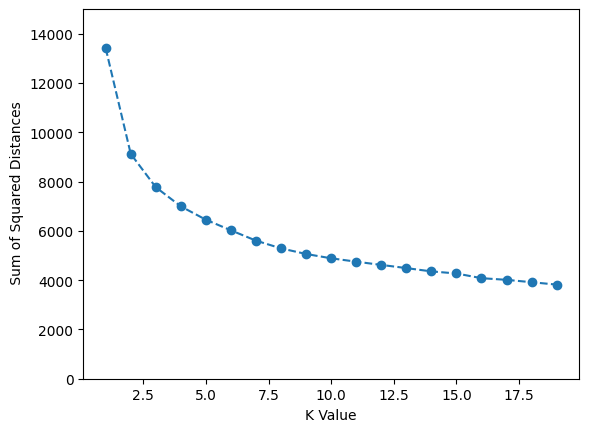

In [ ]:
plt.plot(range(1,20),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.ylim(0, 15000)

In [ ]:
model = KMeans(n_clusters=3, random_state=99);

model.fit(scaled_X);

preds = model.predict(scaled_X)

model.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7772.007479503337

## **cluster analysis**

"Cluster 0" (low quality houses):
- lowest values in all features

"Cluster 1" VS "Cluster 2":

- Exept the 1stFlrSF and 2ndFlrSF, the feature value averages look a little bit higher in cluster 2 than in cluster 1.
- It looks like in total, the two clusters have on average the same number of Square Feet (1800), if we add up the ones of the first and second Floor. However the surface is distributed very differently among the floors between these two clusters : The cluster 2 seems to have its surface focused only on the first floor, while the cluster 1 seems to have its surface equally distributed between the first and second floor. However, cluster 2 should still have an advantage on this aspect because the value of a 1st floor SF (74) is higher than the value of a 2nd floor SF (55) *(see regression analysis 1)*

In [ ]:
X['Cluster']=preds
clusters =  X.groupby('Cluster').mean()
clusters.T

Cluster,0,1,2
ExterQual,2.026746,2.657303,3.032051
KitchenQual,2.133730,2.803371,3.173077
BsmtQual,2.133730,2.901685,3.256410
HeatingQC,2.659733,3.626404,3.823718
GarageCars,1.499257,2.123596,2.391026
FullBath,1.181278,1.985955,1.961538
TotalBsmtSF,952.126300,926.932584,1602.996795
1stFlrSF,1049.112927,1011.738764,1637.410256
2ndFlrSF,197.023774,867.165730,121.881410
MasVnrArea,57.664190,129.101124,202.993590


<Axes: >

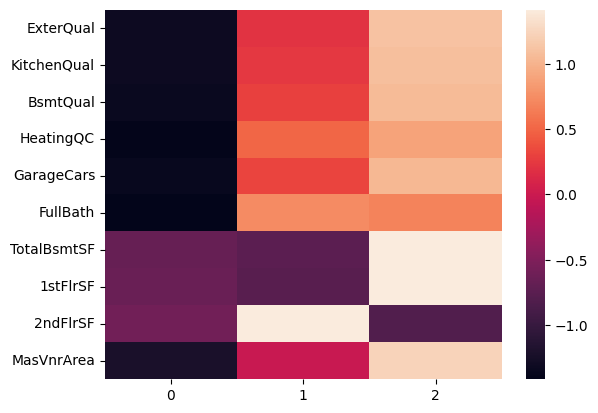

In [ ]:
x = pd.DataFrame(scaler.fit_transform(clusters), columns = clusters.columns).T
sns.heatmap(x)

Let's look at the distribution of 2ndFlrSF in cluster 2

- Our intuition was right, the mean value of 2ndFlrSF was very low in cluster 2 because most of its houses simply does not have a second floor (SF=0)

Text(0.5, 1.0, 'distribution of 2ndFlrSF in cluster 2')

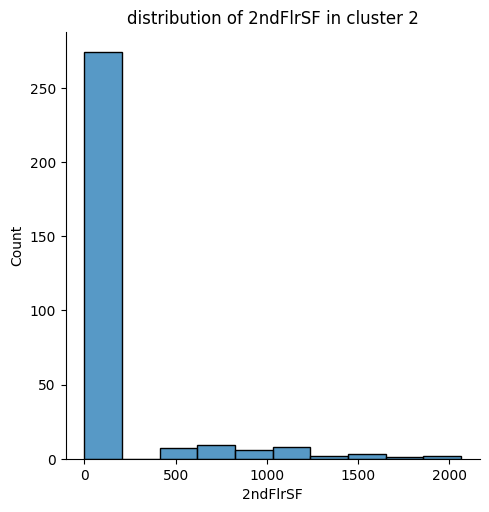

In [ ]:
sns.displot(X[X['Cluster']==2]['2ndFlrSF'])
plt.title('distribution of 2ndFlrSF in cluster 2')

With what we have, and knowing that our features are positively correlated with the price, we can conjecture that the most expensive houses would be in cluster 2. Cluster 1 should have average prices and cluster 0 should have very cheap houses. Let's approve or disapprove our hypotesis

In [ ]:
X = df[feature_set].dropna()
X['Cluster']=preds

In [ ]:
X.groupby('Cluster').mean()['SalePrice']

,SalePrice
Cluster,
0,137121.222883
1,213063.160112
2,264096.785256


Our intuition has been confirmed (obviously as it is performed by Adam). This means that our clustering analysis was right, but also that the 10 features that we have been selecting from the 81 initial ones have, when combined, a significant impact on the price (if we had chosen a non-relevant set of features, the price would have been very similar across the clusters). Let's take some time to appreciate the hardwork that led us to this result.

# 2. Clustering Method 2

- Identify the characteristics of each cluster by analyzing the cluster centers and the mean values of the variables for each cluster.
- Compare the results with the first clustering method and discuss the differences and similarities.
- Provide insights into all the final clusters made in this section

## **hierarchical clustring**

In [ ]:
X = df[feature_set].drop('SalePrice', axis=1).dropna()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

For the hierarchical clustering, let's set the number of clusters equal to 3, similar to the kmeans clustering that we have done. This way we can make better comparisons between the two results

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

model = AgglomerativeClustering(n_clusters=3)

cluster_labels = model.fit_predict(scaled_X)

linkage_matrix = hierarchy.linkage(model.children_)

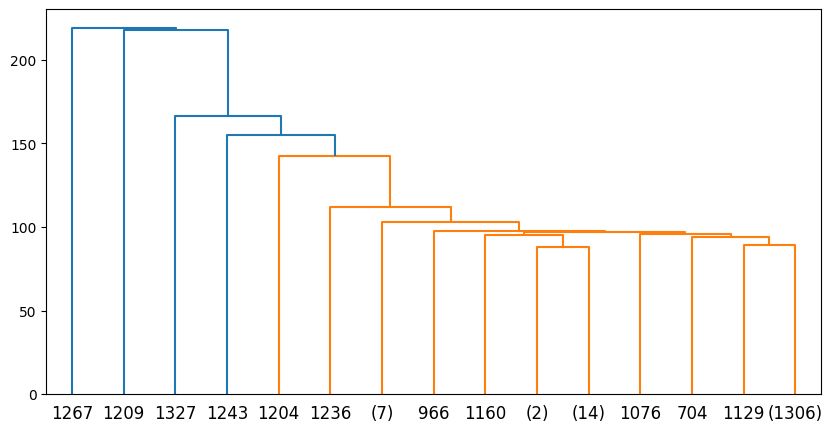

In [ ]:
plt.figure(figsize=(10,5))
# Warning! This plot will take awhile!!
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='lastp',p=15)

## **clustering results comparison**

We got nearly the same results for two different clustering methods, witch could mean that the clusters that we got represent well the data that we have (at least for the features that we have chosen)

In [ ]:
X['Cluster']=cluster_labels
clusters = X.groupby('Cluster').mean().T
clusters = clusters.rename(columns={1: 0, 0: 1})
clusters

Cluster,1,0,2
ExterQual,2.459510,2.083929,3.132
KitchenQual,2.596987,2.207143,3.236
BsmtQual,2.713748,2.176786,3.300
HeatingQC,3.312618,2.748214,3.904
GarageCars,2.054614,1.462500,2.404
FullBath,1.990584,0.985714,2.020
TotalBsmtSF,1021.677966,927.819643,1635.256
1stFlrSF,1130.674200,1004.869643,1655.956
2ndFlrSF,687.975518,167.425000,81.048
MasVnrArea,128.736347,49.600000,207.868


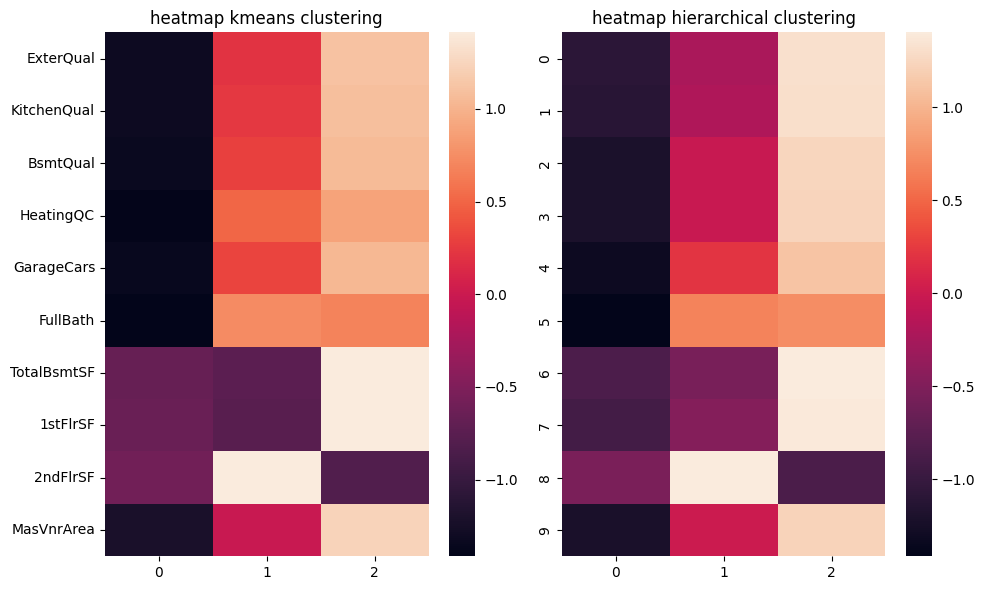

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
scaled_clusters = scaler.fit_transform(clusters.T)

y = pd.DataFrame({0 : scaled_clusters[1], 1: scaled_clusters[0], 2: scaled_clusters[2]})

sns.heatmap(x, ax = ax[0])
ax[0].set_title("heatmap kmeans clustering")
sns.heatmap(y, ax = ax[1])
ax[1].set_title("heatmap hierarchical clustering")

plt.tight_layout()

## **buisness conclusion (on the two clusterings)**

In buisness words, the clustering that we have been doing regroups the houses into 3 categories (these categories are where the offer and demand meet). As ideally, we want a house with features with low offer and high demand, there can be two types of strategies :

**1- prioritize high demand :** make the house correspond to one of these cluster in order to make sure that there will be demand (but at what price as they are very present in the market). *(low risk, low reward)*

**2- prioritize low offer :** make the house outside of these clusters, in order to differentiate ourselves in the market and be able to put a higher price *(high risk, high reward)*

This can be integrated into a larger maket study in order to look for the most profitable type of house that can be sold. But as we don't have any information on the cost and the technical engereering of building a house, we can not go further in this aspect

# 3. Regression Method 1
- Analyze the coefficients to understand the impact of each variable on the Y.
- Discuss the performance of the chosen regression model using the MSE and R^2 metrics.
- Provide insights into how the identified relationships can inform business decisions.

## **prepare the data**

In [ ]:
len(df[feature_set])

1460

In [ ]:
reg_df = df[feature_set].dropna(axis=0)
len(reg_df)

1341

In [ ]:
X = reg_df[feature_set].drop('SalePrice', axis=1)
y = reg_df['SalePrice']

## **apply the linear regression model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X, y)
preds = model.predict(X)
preds

array([218794.06215451, 163230.42037779, 223744.92218999, ...,
       237174.53233394, 132743.15904687, 147112.67498549])

## **analyse the coefficients**

**1) simple coefficients**

In [ ]:
feature_set.remove('SalePrice')

In [ ]:
coefs = pd.DataFrame(data=[model.coef_], columns=feature_set)
coefs.loc[0] = coefs.loc[0].astype(int)
coefs

,ExterQual,KitchenQual,BsmtQual,HeatingQC,GarageCars,FullBath,TotalBsmtSF,1stFlrSF,2ndFlrSF,MasVnrArea
0,17663.0,18669.0,20496.0,2287.0,16336.0,-5856.0,12.0,74.0,55.0,36.0


In [ ]:
feature_set.append('SalePrice')

*mean price (for relativity): 186 824*

In [ ]:
round(y.mean(), 0)

186824.0

**2) standardized coefficients (for comparison)**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

model = LinearRegression()
model.fit(scaled_X, y)
model.coef_

array([10167.04061585, 12187.19894251, 14005.54253841,  2156.22733944,
       10358.92688501, -3204.45975066,  4932.69785932, 28730.49167681,
       24296.5027214 ,  6763.2328875 ])

As we can see, the first floor area and the 2nd floor area have most of the impact on the price

But the features refering to quality are also important

We can neglect the impact of the heating conditions and the number of bathrooms on the Price of a house

In [ ]:
coefs.loc[1] = model.coef_
coefs.loc[1] = coefs.loc[1].astype(int)
coefs.rename(index = {0 : 'simple_coefs', 1 : 'standardized_coefs'}).T.sort_values(by='standardized_coefs', ascending=False)

,simple_coefs,standardized_coefs
1stFlrSF,74.0,28730.0
2ndFlrSF,55.0,24296.0
BsmtQual,20496.0,14005.0
KitchenQual,18669.0,12187.0
GarageCars,16336.0,10358.0
ExterQual,17663.0,10167.0
MasVnrArea,36.0,6763.0
TotalBsmtSF,12.0,4932.0
HeatingQC,2287.0,2156.0
FullBath,-5856.0,-3204.0


*Each coefficent represents what would be the average increase in the price in case of an increase of 1 of the corresponding variable*

Among the variables that represent a quality rating, here is a ranking from the most to the least impactful :

1) BsmtQual

2) KichenQual

3) ExterQual

Among the variables that represent a surface area, here is the ranking :

1) 1stFlrSF

2) 2ndFlrSF

3) MasVnrArea

4) Total BsmtSF

## **evaluate the model error**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

With a mean error of 13 percent, the variance in Price is as of 76 percent explained by our explanatory variables, witch is not bad

- mean absolute error

In [ ]:
mean_absolute_error(y, preds)

24265.555867702784

In [ ]:
mean_absolute_percentage_error(y, preds)

0.13909661479061136

- R^2

In [ ]:
r2_score(y, preds)

0.7670748752444747

## **buisness conclusion**

When making a decision about the plan of a house, it can be useful to know that, on average, each square meter added icrease the house value by :

74 euros for the first floor area

55 euros for the second floor area

36 euros for the Masonry veneer area

12 euros for the basement

In terms of quality, the priority should be given to the basement and the kichen.

The car capacity of the garage is also important

This might be useful when it comes to calculating the cost-advantage of certain features of a house

# 4. Regression Method 2
- Analyze the coefficients to understand the impact of each variable on the Y.
Discuss the performance of the random forest regression model using the MSE and R^2 metrics.
Provide insights into how the identified relationships can inform business decisions.
- Compare those insights with the ones found through the first method, by describing differences and similarities

## **prepare the data**

In [ ]:
len(df[feature_set])

1460

In [ ]:
reg_df = df[feature_set].dropna(axis=0)
len(reg_df)

1341

In [ ]:
X = reg_df[feature_set].drop('SalePrice', axis=1)
y = reg_df['SalePrice']

## **apply the linear regression model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X, y)
preds = model.predict(X)
preds

array([207975.66666667, 178190.        , 216246.16666667, ...,
       265829.33      , 139549.3       , 150359.4       ])

## **analyse the coefficients**

With the random forest regression analysis, we conclude that the *car capacity of the garage* and the *external quality of the house* represent both almost **50 percent** of the importance regarding the Price

The *square feet of the first floor, second floor, and basement* represent together around **30 percent** of the importance

In [ ]:
feature_set.remove('SalePrice')

In [ ]:
coefs = pd.DataFrame(data=[model.feature_importances_], columns=feature_set)
coefs.loc[0] = coefs.loc[0]*100
coefs = coefs.T.sort_values(by=0, ascending=False).T
coefs

,GarageCars,ExterQual,1stFlrSF,2ndFlrSF,FullBath,TotalBsmtSF,KitchenQual,MasVnrArea,BsmtQual,HeatingQC
0,28.077121,18.243604,11.676902,11.27818,8.939101,8.692265,5.000211,4.05672,3.296712,0.739185


In [ ]:
feature_set.append('SalePrice')

<Axes: xlabel='None', ylabel='0'>

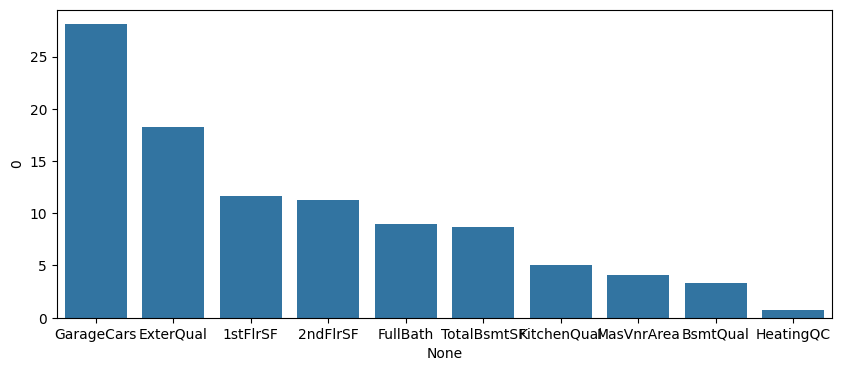

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x=coefs.columns, y=coefs.loc[0])

The results that we got are completely different from the ones we got in the least squares regression :

The two most important features were the *1stFlrSF* and *2ndFlrSF*

The importance of the *garage capacity* and the *external quality* is here almost half of the total importance where it is not particularly important in the least squares regression

## **evaluate the model error**

With a *mean absolute percentage error* of **5 percent** and an *r_squared* of **97 percent**, the random forest regressor fits better our data. Therefore, we can rely more on it for buisness decisions based of feature importances on the price.

However, this method has limitations as our two models have been trained and evaluated on the same dataset, so the random forest regressor may be a little bit overfit (because it is more complex than LR)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_error(y, preds)

8568.981299797808

In [ ]:
mean_absolute_percentage_error(y, preds)

0.04903821935036751

In [ ]:
r2_score(y, preds)

0.970607692736408

## **buisness conclusion**

In both regression analysis that we have done, the importance of these features have been significant :
- GarageCars
- ExterQual
- 1stFlrSF
- 2ndFlrSF

Therefore, they should be emphasized in the conception when it comes to maximizing the future price of the house